In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns


In [2]:
import spacy
nlp = spacy.load('pt')


df = pd.read_csv('../dados_categorizados_completo_novo.csv')
df.head()

,Id,Enunciado,Tópico,Contexto
0,994,Meu primeiro programa\nEscreva um programa que...,Ambientação,Outros
1,996,Impressão de caracteres na tela\nEscreva um pr...,Ambientação,Outros
2,999,Impressão de caracteres na tela (Bart Simpson)...,Ambientação,Outros
3,1000,Operadores aritméticos\nQual o valor de X para...,Ambientação,Matemático
4,578,Operadores aritméticos \nQual o valor de Y par...,Ambientação,Matemático


In [3]:
def get_new_sentences(da,maximum,synonyms_lexicon):
    strings=[]
    for elemento in da['Enunciado']:
        if(len(da)+len(strings)<maximum):
            contador=0
            lista=elemento.split()
            while(contador<len(lista)):
                if(lista[contador] in synonyms_lexicon):
                    lista[contador]=synonyms_lexicon[lista[contador]][0]
                contador+=1
            strings+=[' '.join(lista)]
        else:
            break

    new_sentences = pd.Series(strings)
    return new_sentences

def get_synonyms_lexicon(path):
    synonyms_lexicon = {}
    text_entries = [l.strip() for l in open(path).readlines()]
    for e in text_entries:
        e = e.split(' ')
        k = e[0]
        v = e[1:len(e)]
        synonyms_lexicon[k] = v
    return synonyms_lexicon

synonyms_lexicon = get_synonyms_lexicon('../paráfrase/arq3.txt')

In [4]:
maximum = df.Contexto.value_counts().max()
g = df.groupby('Contexto')


mat = g.get_group('Matemático')
comercial = g.get_group('Comercial')
jogos = g.get_group('Jogos')
escolar = g.get_group('Escolar')
outros = g.get_group('Outros')
transito = g.get_group('Trânsito')
esporte = g.get_group('Esporte')
fisica = g.get_group('Física')
bancario = g.get_group('Bancário')
RH = g.get_group('RH')
f_s = g.get_group('Filmes e séries')
populacao = g.get_group('População')
quimica = g.get_group('Química')
pessoa = g.get_group('Pessoa')
d_h = g.get_group('Data e hora')
seguranca = g.get_group('Segurança')
ambiente = g.get_group('Meio ambiente')
pesquisa = g.get_group('Pesquisa')
saude = g.get_group('Saúde')
consumo = g.get_group('Consumo')
geografia = g.get_group('Geografia')
producao = g.get_group('Produção')
imposto = g.get_group('Imposto')
computacional = g.get_group('Computacional')

new_jogos = get_new_sentences(jogos,maximum,synonyms_lexicon)
new_comercial = get_new_sentences(comercial,maximum,synonyms_lexicon)
new_escolar = get_new_sentences(escolar,maximum,synonyms_lexicon)
new_outros = get_new_sentences(outros,maximum,synonyms_lexicon)
new_transito = get_new_sentences(transito,maximum,synonyms_lexicon)
new_esporte = get_new_sentences(esporte,maximum,synonyms_lexicon)
new_fisica = get_new_sentences(fisica,maximum,synonyms_lexicon)
new_bancario = get_new_sentences(bancario,maximum,synonyms_lexicon)
new_RH = get_new_sentences(RH,maximum,synonyms_lexicon)
new_f_s = get_new_sentences(f_s,maximum,synonyms_lexicon)
new_populacao = get_new_sentences(populacao,maximum,synonyms_lexicon)
new_quimica = get_new_sentences(quimica,maximum,synonyms_lexicon)
new_pessoa = get_new_sentences(pessoa,maximum,synonyms_lexicon)
new_d_h = get_new_sentences(d_h,maximum,synonyms_lexicon)
new_seguranca = get_new_sentences(seguranca,maximum,synonyms_lexicon)
new_pesquisa = get_new_sentences(pesquisa,maximum,synonyms_lexicon)
new_ambiente = get_new_sentences(ambiente,maximum,synonyms_lexicon)
new_saude = get_new_sentences(saude,maximum,synonyms_lexicon)
new_consumo = get_new_sentences(consumo,maximum,synonyms_lexicon)
new_geografia = get_new_sentences(geografia,maximum,synonyms_lexicon)
new_producao = get_new_sentences(producao,maximum,synonyms_lexicon)
new_computacional = get_new_sentences(computacional,maximum,synonyms_lexicon)
new_imposto = get_new_sentences(imposto,maximum,synonyms_lexicon)


new_jogos = pd.DataFrame(new_jogos,columns=['Enunciado'])
new_jogos['Contexto'] = 'Jogos'
new_jogos['Tópico']='Nada'

new_comercial = pd.DataFrame(new_comercial,columns=['Enunciado'])
new_comercial['Contexto'] = 'Comercial'
new_comercial['Tópico']='Nada'


new_escolar = pd.DataFrame(new_escolar,columns=['Enunciado'])
new_escolar['Contexto'] = 'Escolar'
new_escolar['Tópico']='Nada'


new_outros = pd.DataFrame(new_outros,columns=['Enunciado'])
new_outros['Contexto'] = 'Outros'
new_outros['Tópico']='Nada'


new_transito = pd.DataFrame(new_transito,columns=['Enunciado'])
new_transito['Contexto'] = 'Trânsito'
new_transito['Tópico']='Nada'


new_esporte = pd.DataFrame(new_esporte,columns=['Enunciado'])
new_esporte['Contexto'] = 'Esporte'
new_esporte['Tópico']='Nada'


new_fisica = pd.DataFrame(new_fisica,columns=['Enunciado'])
new_fisica['Contexto'] = 'Física'
new_fisica['Tópico']='Nada'


new_bancario = pd.DataFrame(new_bancario,columns=['Enunciado'])
new_bancario['Contexto'] = 'Bancário'
new_bancario['Tópico']='Nada'


new_RH = pd.DataFrame(new_RH,columns=['Enunciado'])
new_RH['Contexto'] = 'RH'
new_RH['Tópico']='Nada'


new_f_s = pd.DataFrame(new_f_s,columns=['Enunciado'])
new_f_s['Contexto'] = 'Filmes e séries'
new_f_s['Tópico']='Nada'


new_populacao = pd.DataFrame(new_populacao,columns=['Enunciado'])
new_populacao['Contexto'] = 'População'
new_populacao['Tópico']='Nada'


new_quimica = pd.DataFrame(new_quimica,columns=['Enunciado'])
new_quimica['Contexto'] = 'Química'
new_quimica['Tópico']='Nada'


new_pessoa = pd.DataFrame(new_pessoa,columns=['Enunciado'])
new_pessoa['Contexto'] = 'Pessoa'
new_pessoa['Tópico']='Nada'


new_d_h = pd.DataFrame(new_d_h,columns=['Enunciado'])
new_d_h['Contexto'] = 'Data e hora'
new_d_h['Tópico']='Nada'


new_seguranca = pd.DataFrame(new_seguranca,columns=['Enunciado'])
new_seguranca['Contexto'] = 'Segurança'
new_seguranca['Tópico']='Nada'


new_pesquisa = pd.DataFrame(new_pesquisa,columns=['Enunciado'])
new_pesquisa['Contexto'] = 'Pesquisa'
new_pesquisa['Tópico']='Nada'


new_ambiente = pd.DataFrame(new_ambiente,columns=['Enunciado'])
new_ambiente['Contexto'] = 'Meio ambiente'
new_ambiente['Tópico']='Nada'


new_saude = pd.DataFrame(new_saude,columns=['Enunciado'])
new_saude['Contexto'] = 'Saúde'
new_saude['Tópico']='Nada'


new_consumo = pd.DataFrame(new_consumo,columns=['Enunciado'])
new_consumo['Contexto'] = 'Consumo'
new_consumo['Tópico']='Nada'


new_geografia = pd.DataFrame(new_geografia,columns=['Enunciado'])
new_geografia['Contexto'] = 'Geografia'
new_geografia['Tópico']='Nada'


new_producao = pd.DataFrame(new_producao,columns=['Enunciado'])
new_producao['Contexto'] = 'Produção'
new_producao['Tópico']='Nada'


new_computacional= pd.DataFrame(new_computacional,columns=['Enunciado'])
new_computacional['Contexto'] = 'Computacional'
new_computacional['Tópico']='Nada'


new_imposto= pd.DataFrame(new_imposto,columns=['Enunciado'])
new_imposto['Contexto'] = 'Imposto'
new_imposto['Tópico']='Nada'


jogos_extended = pd.concat([jogos, new_jogos], keys = ['Enunciado', 'Contexto'])
comercial_extended = pd.concat([comercial, new_comercial], keys = ['Enunciado', 'Contexto'])
escolar_extended = pd.concat([escolar, new_escolar], keys = ['Enunciado', 'Contexto'])
outros_extended = pd.concat([outros, new_outros], keys = ['Enunciado', 'Contexto'])
transito_extended = pd.concat([transito, new_transito], keys = ['Enunciado', 'Contexto'])
esporte_extended = pd.concat([esporte, new_esporte], keys = ['Enunciado', 'Contexto'])
fisica_extended = pd.concat([fisica, new_fisica], keys = ['Enunciado', 'Contexto'])
bancario_extended = pd.concat([bancario, new_bancario], keys = ['Enunciado', 'Contexto'])
RH_extended = pd.concat([RH, new_RH], keys = ['Enunciado', 'Contexto'])
f_s_extended = pd.concat([f_s, new_f_s], keys = ['Enunciado', 'Contexto'])
populacao_extended = pd.concat([populacao, new_populacao], keys = ['Enunciado', 'Contexto'])
quimica_extended = pd.concat([quimica, new_quimica], keys = ['Enunciado', 'Contexto'])
pessoa_extended = pd.concat([pessoa, new_pessoa], keys = ['Enunciado', 'Contexto'])
d_h_extended = pd.concat([d_h, new_d_h], keys = ['Enunciado', 'Contexto'])
seguranca_extended = pd.concat([seguranca, new_seguranca], keys = ['Enunciado', 'Contexto'])
pesquisa_extended = pd.concat([pesquisa, new_pesquisa], keys = ['Enunciado', 'Contexto'])
ambiente_extended = pd.concat([ambiente, new_ambiente], keys = ['Enunciado', 'Contexto'])
saude_extended = pd.concat([saude, new_saude], keys = ['Enunciado', 'Contexto'])
consumo_extended = pd.concat([consumo, new_consumo], keys = ['Enunciado', 'Contexto'])
geografia_extended = pd.concat([geografia, new_geografia], keys = ['Enunciado', 'Contexto'])
producao_extended = pd.concat([producao, new_producao], keys = ['Enunciado', 'Contexto'])
computacional_extended = pd.concat([computacional, new_computacional], keys = ['Enunciado', 'Contexto'])
imposto_extended = pd.concat([imposto, new_imposto], keys = ['Enunciado', 'Contexto'])

df = pd.concat([mat, jogos_extended,comercial_extended,escolar_extended,outros_extended,
           transito_extended,esporte_extended,fisica_extended,bancario_extended,
           RH_extended,f_s_extended,populacao_extended,quimica_extended,
           pessoa_extended,d_h_extended,seguranca_extended,pesquisa_extended,
           ambiente_extended,saude_extended,consumo_extended,geografia_extended,
           producao_extended,computacional_extended,imposto_extended])

/home/samuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:169: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/samuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:170: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/samuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:171: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 

In [5]:
df.Contexto.value_counts()

Matemático         261
Comercial          240
Jogos              192
Escolar            158
Outros             118
Trânsito            86
Esporte             84
Física              72
RH                  70
Bancário            70
Filmes e séries     60
População           50
Química             46
Pessoa              44
Data e hora         42
Segurança           40
Meio ambiente       36
Pesquisa            36
Saúde               34
Consumo             32
Geografia           22
Produção            14
Computacional       12
Imposto             10
Name: Contexto, dtype: int64

In [6]:
def n_grams(sentence):
    return sentence.split()
master=[]
for elemento in df['Enunciado']:
    doc=nlp(elemento)
    lista=[]
    for token in doc:
        if(token.text not in nlp.Defaults.stop_words and token.lemma_ not in nlp.Defaults.stop_words and token.text.isalpha() and len(token.text)>1):
            lista+=[token.lemma_]
    master+=[lista]

In [7]:
df['tokens']=master

In [8]:
from gensim.models import Word2Vec

In [9]:
model = Word2Vec(min_count=10,
                     window=10,
                     size=20,
                     #sample=6e-5, 
                     #alpha=0.03, 
                     #min_alpha=0.0007, 
                     #negative=20,
                     workers=4,
                     sg=0,
                     hs=1)

In [10]:
model.build_vocab(sentences=df.tokens)
# model.train(df.tokens, total_examples=model.corpus_count, epochs=30, report_delay=1)

In [11]:
# model.save("w2v.model")
# print("Model Saved")

In [12]:
# max_epochs = 100

# for epoch in range(max_epochs):
#     model.train(df.tokens,
#                 total_examples=model.corpus_count,
#                 epochs=model.iter)
#     # decrease the learning rate
#     model.alpha -= 0.0002
#     # fix the learning rate, no decay
#     model.min_alpha = model.alpha

In [13]:
# model.init_sims(replace=True)
# X = model[model.wv.vocab]

In [14]:
# import umap
# %matplotlib inline

# cluster_embedding = umap.UMAP(n_neighbors=10, min_dist=0.0,
#                               n_components=2, random_state=42).fit_transform(X)

# plt.figure(figsize=(10,9))
# plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [15]:
vocab=[]
words=[]
for i in df.tokens:
    for j in i:
        try:
            vocab.append(model.wv.word_vec(j))
            if(j not in words):
                words+=[j]
        except:
            continue

In [16]:
len(words)
teste=[a*0 for a in range(0,len(words))]

In [17]:
def procura(palavra,lista):
    contador=0
    while(len(lista)>contador):
        if(lista[contador]==palavra):
            return contador
        contador+=1
    return -1

In [18]:
from numpy import linalg as LA
vectors=[]
vec=[]
for elemento in df.tokens:
    for palavra in elemento:
        indice=procura(palavra,words)
        if(indice>-1):
            vec=[]
            vec.append(model.wv.word_vec(palavra))
            for cada in vec:
                teste[indice]=LA.norm(cada, -2)
    vectors.append(teste)
    teste=[a*0 for a in range(0,len(words))]

In [19]:
# vec = []
# vectors = []

# for i in df.tokens:
#     for j in i:
#         try:
#             vec.append(model.wv.word_vec(j))
#         except:
#             continue
#     vectors.append(vec)
#     vec = []

In [20]:
# tam = 0

# for i in range(0, len(vectors)):
#     if(tam < len(vectors[i])):
#         tam = len(vectors[i])

In [21]:
# zeros = np.zeros(1)
# zeros

In [22]:
# for i in range(0, len(vectors)):
#     while(len(vectors[i]) < tam):
#         vectors[i].append(zeros)

In [23]:
# from numpy import linalg as LA

# vec = []
# vectors_norm = []

# for i in vectors:
#     for j in i:
#         vec.append(LA.norm(j, -2))
#     vectors_norm.append(vec)
#     vec = []

In [24]:
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(algorithm='randomized', n_components=100)
# senteces = svd.fit_transform(vectors_norm)

In [25]:
X=vectors
y=df['Contexto'].values

In [26]:
topico=[]
for elemento in df['Tópico']:
    topico+=[elemento]

In [27]:
contador=0
X_novo=[]
y_novo=[]
while(contador<len(X)):
    if(topico[contador]!='Nada'):
        X_novo+=[X[contador]]
        y_novo+=[y[contador]]
    contador+=1

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
pipeline = RandomForestClassifier(random_state=42)
# pipeline=LinearSVC()

In [56]:
X=X_novo
y=y_novo
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(pipeline,X,y,cv=10)

/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [57]:
print(metrics.confusion_matrix(y,y_pred))

[[ 32   1   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0]
 [  1  90   0   0   0   2   1   0   0   0   0   1  13   0   2   0   0   0
    4   0   3   1   0   2]
 [  0   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   3   0  12   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  13   0   0   0   0   0   0   1   4   0   2   0   0   0
    1   0   0   0   0   0]
 [  0   2   0   0   0  70   0   0   0   2   0   0   4   0   1   0   0   0
    0   0   0   0   0   0]
 [  0   2   0   0   0   1  29   0   0   0   0   2   5   0   1   0   2   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   1   0  28   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31   0   0   2   3   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   3   0   0   0   6   0   0   2   0   0   0   0   0
    0   0   0   0

In [58]:
print(metrics.classification_report(y,y_pred))

                 precision    recall  f1-score   support

       Bancário       0.86      0.91      0.89        35
      Comercial       0.74      0.75      0.74       120
  Computacional       1.00      1.00      1.00         6
        Consumo       1.00      0.75      0.86        16
    Data e hora       1.00      0.62      0.76        21
        Escolar       0.90      0.89      0.89        79
        Esporte       0.97      0.69      0.81        42
Filmes e séries       0.97      0.93      0.95        30
         Física       0.86      0.86      0.86        36
      Geografia       0.55      0.55      0.55        11
        Imposto       1.00      0.80      0.89         5
          Jogos       0.84      0.75      0.79        96
     Matemático       0.76      0.97      0.85       261
  Meio ambiente       1.00      0.89      0.94        18
         Outros       0.82      0.68      0.74        59
       Pesquisa       1.00      0.89      0.94        18
         Pessoa       0.89    

In [59]:
print(metrics.accuracy_score(y,y_pred))

0.8325358851674641


In [60]:
from sklearn.metrics import confusion_matrix

mat_etc = confusion_matrix(y, y_pred)
row_sums = mat_etc.sum(axis=1, keepdims=True)

In [61]:
norm_conf_mx = mat_etc / row_sums

In [62]:
labels = ['Bancário','Comercial','Computacional','Consumo','Data e hora','Escolar','Esportes',
         'Filmes e séries','Física','Geogragia','Imposto','Jogos','Matemático',
          'Meio ambiente','Outros','Pesquisa','Pessoa','População','Produção',
         'Química','RH','Saúde','Segurança','Trânsito']

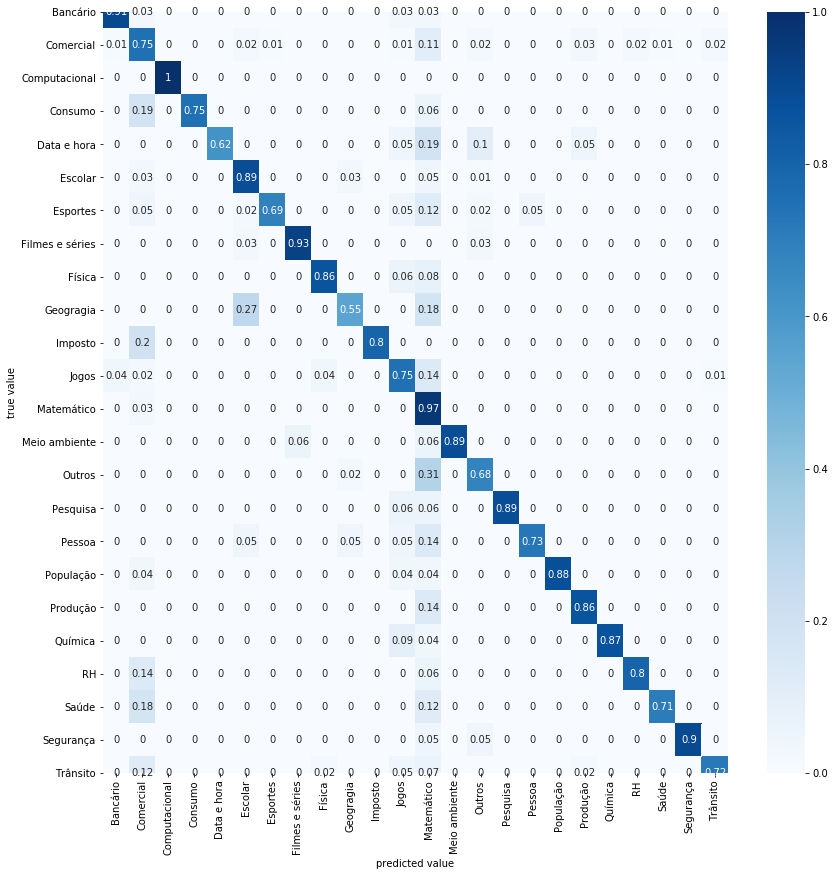

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(pd.DataFrame(norm_conf_mx.round(2),
                         columns=labels, 
                         index=labels), 
            annot=True, 
            fmt='g', 
            cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');